In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("Titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull() #finding missing data values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

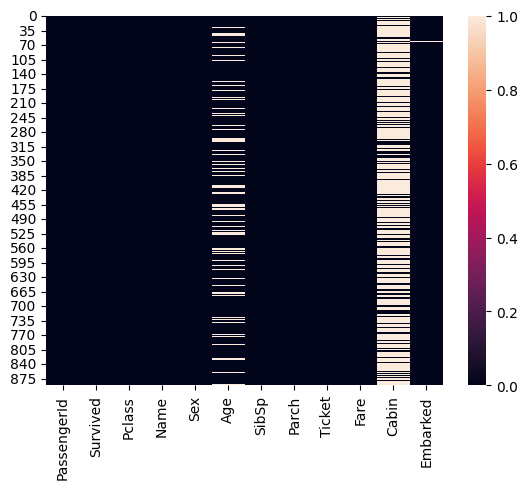

In [5]:
sns.heatmap(train.isnull())#using heatmap seaborn we can find missing values graphically

<Axes: >

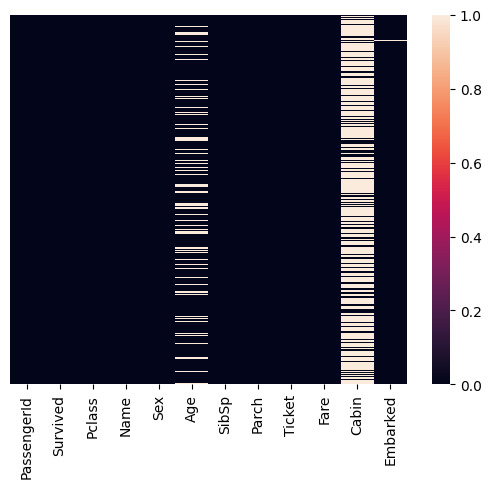

In [6]:
sns.heatmap(train.isnull(), yticklabels=False)

<Axes: >

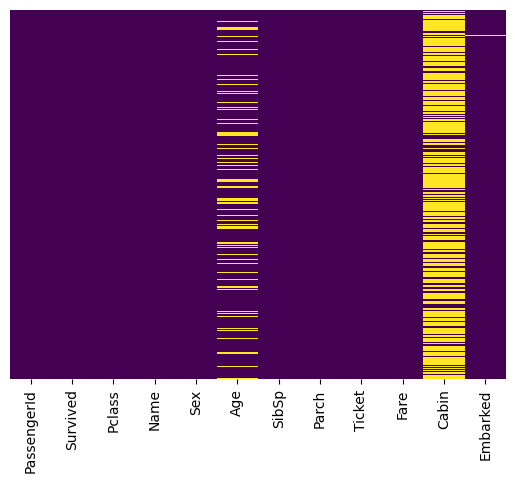

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

<Axes: xlabel='Survived', ylabel='count'>

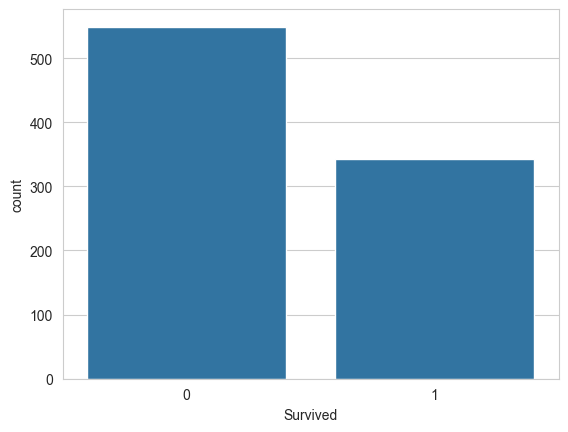

In [8]:

sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train )


<Axes: xlabel='Survived', ylabel='count'>

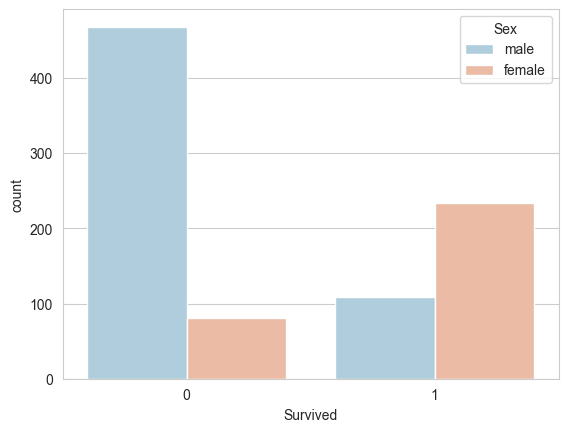

In [9]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, hue="Sex", palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

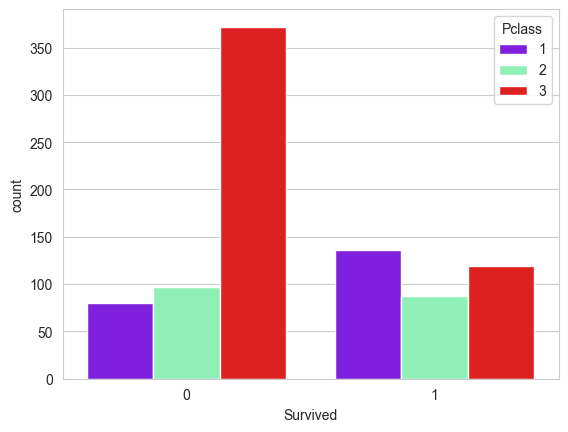

In [10]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, hue="Pclass", palette="rainbow" )

C:\Users\naga\AppData\Local\Temp\ipykernel_9480\1859900260.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"].dropna(),  kde=False, color="darkred", bins=40)


<Axes: xlabel='Age'>

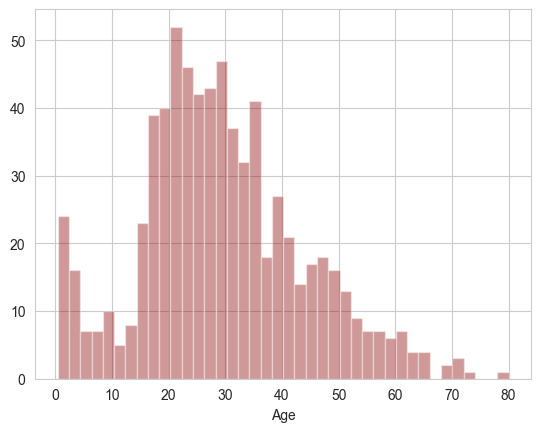

In [11]:
sns.distplot(train["Age"].dropna(),  kde=False, color="darkred", bins=40)

<Axes: >

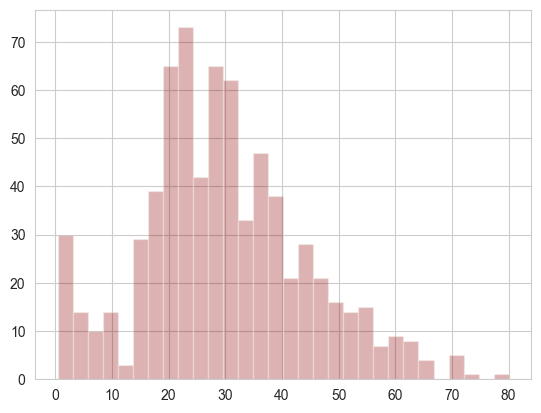

In [12]:
train["Age"].hist(bins=30, color="darkred", alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

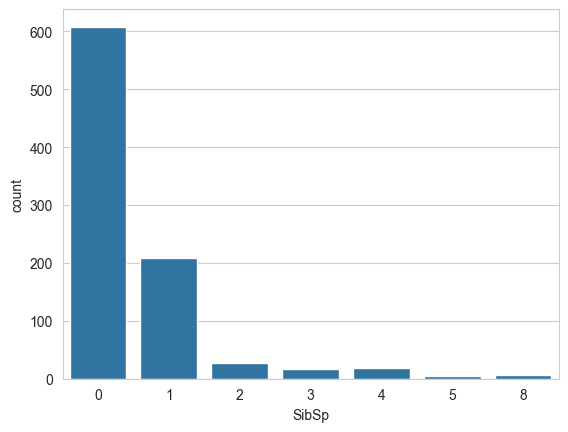

In [13]:
sns.countplot(x="SibSp", data=train)

<Axes: >

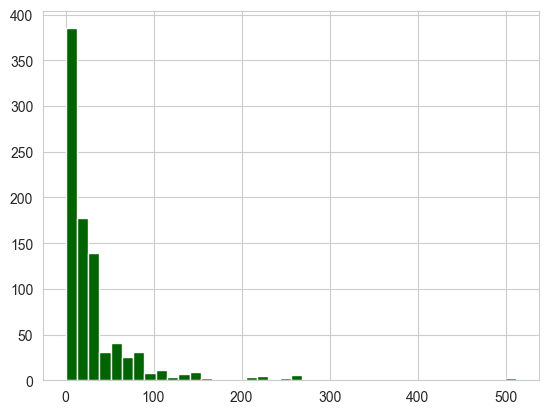

In [14]:
train["Fare"].hist(bins=40, color="darkgreen")

# Data Cleaning


C:\Users\naga\AppData\Local\Temp\ipykernel_9480\1638094620.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass", y="Age", data=train,palette="winter")


<Axes: xlabel='Pclass', ylabel='Age'>

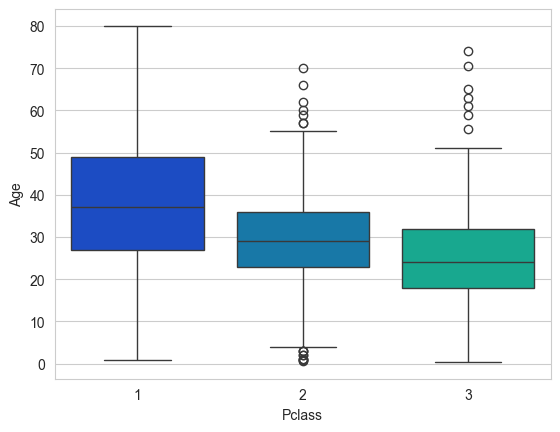

In [15]:
sns.boxplot(x="Pclass", y="Age", data=train,palette="winter")

In [16]:
def impute_age(cols):
    Pclass=cols[1]
    Age=cols[0]
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
#now applying that functional
train["Age"]=train[["Age","Pclass"]].apply(impute_age,axis=1)

<Axes: >

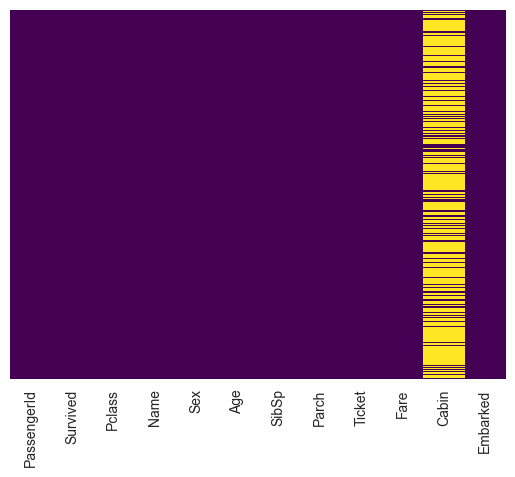

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [19]:
train.drop("Cabin", axis=1, inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
train.dropna(inplace=True)

converting categorical features

In [22]:
pd.get_dummies(train["Embarked"], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
sex=pd.get_dummies(train["Sex"], drop_first=True)
embark=pd.get_dummies(train["Embarked"], drop_first=True)

In [24]:
train.drop(["Sex", "Embarked","Name","Ticket"], axis=1, inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [26]:
train=pd.concat([train,sex,embark], axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
train.drop("Survived", axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [29]:
train["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test=train_test_split(train.drop("Survived", axis=1),
                                                  train["Survived"], test_size=0.30, random_state=101)

# Training and predecting

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel=LogisticRegression()
logmodel.fit(x_train, y_train)

C:\Users\naga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
predictions=logmodel.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix

In [42]:
accuracy=confusion_matrix(y_test, predictions)

In [43]:
accuracy

array([[148,  15],
       [ 39,  65]], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy=accuracy_score(y_test, predictions)

In [46]:
accuracy

0.797752808988764